In [20]:
import numpy as np
import matplotlib.pyplot as plt

Quantum Neural Networks (QNNs) are a type of machine learning algorithms that use quantum computing to model and analyze data. They can be used for both classification and regression of data, similar to classical neural networks. The key difference between QNNs and classical neural networks is the way they process data, with QNNs relying on quantum mechanics and quantum algorithms to make predictions.

In classification problems, the goal of a QNN is to predict the class label of a given input data. In regression problems, the goal is to predict a continuous output value given a set of input data. Both of these tasks can be performed by QNNs by training the network on a dataset and adjusting its parameters to minimize the difference between the predicted and actual output values.

One advantage of QNNs over classical neural networks is their ability to process large amounts of data in parallel, which can lead to faster training and prediction times for certain types of problems. Additionally, some researchers believe that QNNs may have better generalization performance, meaning that they can generalize from their training data to new, unseen data better than classical neural networks.

Overall, the use of QNNs in machine learning is still an active area of research, with many open questions and challenges that need to be addressed before they can be widely adopted in practical applications. However, their potential to offer new and powerful ways of analyzing and making predictions from data makes them a promising area of research for the future

In Qiskit, there are three types of quantum neural networks (QNNs): Circuit QNN, Opflow QNN, and Two-Layer QNN. Each type of QNN has a different architecture and is used for different applications. The Circuit QNN is a type of QNN that is built by stacking quantum gates and classical operations, while the Opflow QNN is a type of QNN that is built using quantum operations that are modeled as quantum circuits. The Two-Layer QNN is a type of QNN that is built using two quantum circuits, where the first quantum circuit is used to embed the input data into quantum states, and the second quantum circuit is used to learn the mapping between the embedded data and the target output.

<p align="center">
  <img src="./qnn.png" width="50%">
</p>

# Regression

In [21]:
def generate_waveline(num_points):
    """
    Generates a waveform with `num_points` data points using a combination of sine functions.

    Parameters:
    ------------

    `num_points` (`int`): the number of data points to generate.

    Returns:
    --------

    `tuple`: a tuple of two arrays - `x` values and `y` values.

    """
    x = np.linspace(0.5, 0.5 + 2 * np.pi, num_points)
    y = 0.3 * np.sin(x) + 0.4 * np.sin(2 * x) - 0.2 * np.sin(0.5 * x)

    return x.reshape((-1, 1)), y

This function generates a waveform by creating an array of `x` values using the numpy function `linspace`, which returns evenly spaced numbers over a specified interval. Then, it calculates the corresponding `y` values using a combination of sine functions with different frequencies and amplitudes. The final output is a tuple of two arrays - `x` values and `y` values.

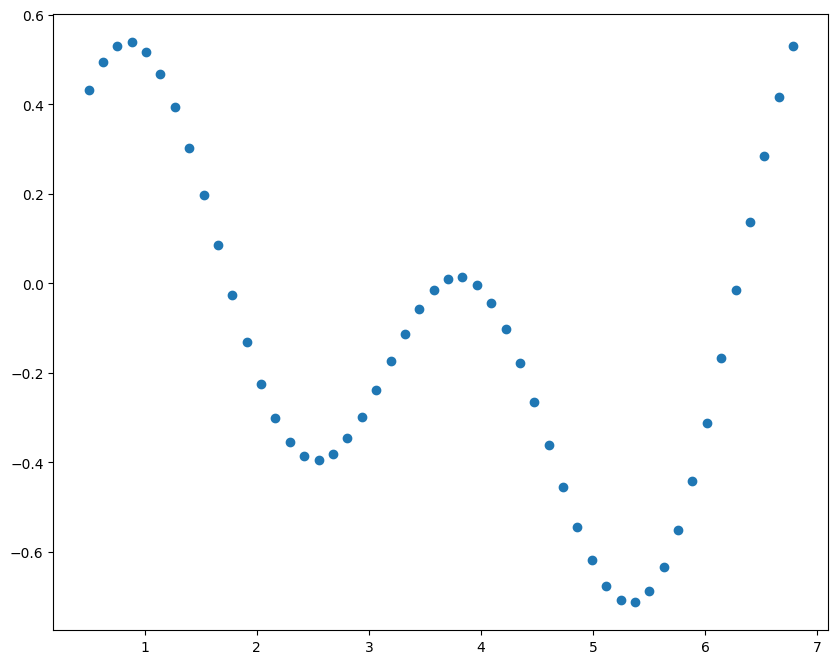

In [22]:
X, y = generate_waveline(50)

plt.figure(figsize=(10, 8))
plt.plot(X, y.real, "o")
plt.show()

This code uses the `generate_waveline` function to generate a waveform with 50 data points, and assigns the resulting `x` and `y` values to the variables `X` and `y` respectively. 
It will create a plot with 50 data points represented by circles, with `x` and `y` values generated by the function `generate_waveline` on the given figure size.

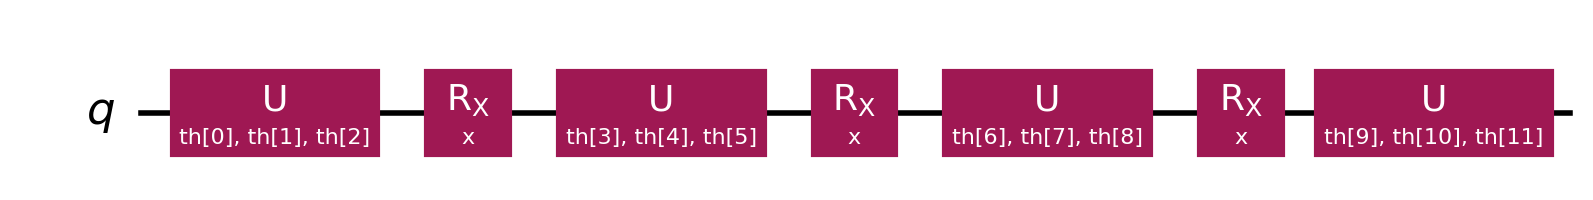

In [23]:
from qiskit import QuantumCircuit, Aer
from qiskit.circuit import Parameter, ParameterVector

reps = 3
circuit = QuantumCircuit(1)
x = Parameter("x")
theta = ParameterVector("th", 3 * (reps + 1))

for i in range(reps):
    circuit.u(theta[3 * i], theta[3 * i + 1], theta[3 * i + 2], 0)
    circuit.rx(x, 0)

circuit.u(*theta[-3:], 0)
circuit.draw("mpl", style="iqx", scale=2)

It creates a quantum circuit with 1 qubit, and creates a `Parameter` `'x'` and a `ParameterVector` `'th'` which will store `3*(reps+1)` parameters.

It then enters a for loop that iterates for the number of reps, which is 3. In each iteration, it applies a unitary gate `u` to the qubit with the parameters given by `theta[3 * i]`, `theta[3 * i + 1]`, `theta[3 * i + 2]`. Then it applies a rotation gate `rx` to the qubit with parameter `'x'`.

After the loop, it applies another unitary gate to the qubit with the last 3 parameters of theta.

The final circuit will have 3 unitary gates with 3 parameters each, in a sequence and each one of them with a rotation gate.

In [24]:
from qiskit_machine_learning.neural_networks import OpflowQNN
from qiskit.opflow import Z, StateFn

expectation = StateFn(Z, is_measurement=True) @ StateFn(circuit)
qnn = OpflowQNN(
    expectation,
    input_params=[x],
    weight_params=list(theta),
    quantum_instance=Aer.get_backend("statevector_simulator"),
)

The code defines an `expectation` variable that is equal to the expectation of the `Z` operator (a Pauli Z operator) applied to the output state of the circuit. The `StateFn` function is used to create a quantum state object representing the circuit. The `@` operator is used to represent the inner product between states. The `is_measurement` parameter set to `True`, indicates that this operator is a measurement operator.

The QNN is then created by passing the expectation variable, the input parameter `'x'` and the weight parameter list `theta` to the `OpflowQNN` class. The `quantum_instance` parameter specifies the quantum backend to use for the simulation, in this case, the `'statevector_simulator'` backend from the `Aer` provider is used to simulate the quantum neural network.

In [25]:
loss_history = []


def store_loss(weights, loss_value):
    """
    Store the loss value during the training process of a neural network.

    Parameters:
    -----------
    `weights`: `array-like`
        The current weights of the neural network
    `loss_value`: `float`
        The current value of the loss function

    Returns:
    --------
    `None`
    """
    loss_history.append(loss_value)

The `weights` argument is not used in this function, it could be used to keep track of the weights during the training process or to store the weights after the training process is complete.

The function can be used to track the loss during the training process of a neural network, and the `loss_history` list can be plotted to visualize the training progress over time. The loss value is a metric to evaluate the performance of the network. It can be used to check whether the network is improving or not. If the loss is decreasing then it means that the network is learning and improving, otherwise, it means that the network is not learning or has reached a local minimum.

In [26]:
from qiskit_machine_learning.algorithms import NeuralNetworkRegressor
from qiskit.algorithms.optimizers.cobyla import COBYLA

regressor = NeuralNetworkRegressor(
    neural_network=qnn, optimizer=COBYLA(), loss="squared_error", callback=store_loss
)

This class is used to train a quantum neural network (QNN) for regression tasks.

The `neural_network` argument is set to the `qnn` object created previously, which is the quantum neural network that will be trained.

The `optimizer` argument is set to an instance of the `COBYLA` class. This is the optimization algorithm that will be used to adjust the weights of the QNN during training. COBYLA (Constrained Optimization BY Linear Approximations) is a type of optimization algorithm that finds the minimum of a function subject to nonlinear constraints.

The `loss` argument is set to `'squared_error'`, which means that the mean squared error will be used as the loss function to evaluate the performance of the QNN during training.

The `callback` argument is set to `store_loss`, which means that the `store_loss` function defined earlier will be called after each iteration of the optimization algorithm to store the current value of the loss function.

In [27]:
regressor.fit(X, y)

This code calls the `fit` method on the `regressor` object, which trains the quantum neural network (QNN) on the dataset specified by the `X` and `y` variables.

`X` and `y` are the independent and dependent variables of the dataset respectively. The fit method takes these variables as input and uses them to train the QNN. The method adjusts the weights of the QNN using the optimization algorithm specified in the `optimizer` argument of the `NeuralNetworkRegressor` class. It also uses the loss function specified in the `loss` argument to evaluate the performance of the QNN during training.

The training process stops when the optimization algorithm converges to a minimum of the loss function or when the maximum number of iterations is reached.

It's also worth noting that the `fit` method can take additional arguments such as `batch_size` and `epochs` to control the training process. The `batch_size` argument is used to specify the number of samples used in each iteration of the optimization algorithm and the `epochs` argument is used to specify the number of times the optimization algorithm is run over the entire dataset.

In [28]:
y_hat = regressor.predict(X)

This code calls the `predict` method on the regressor object, which uses the trained quantum neural network (QNN) to make predictions on the input dataset specified by the `X` variable.

The `predict` method takes the input dataset as an argument, and the QNN uses this data to make predictions on the dependent variable. The method returns an array of predictions, which in this case is assigned to the variable `y_hat`.

It's worth noting that the predict method can also take an optional argument `batch_size` that is used to specify the number of samples used in each iteration of the prediction process.

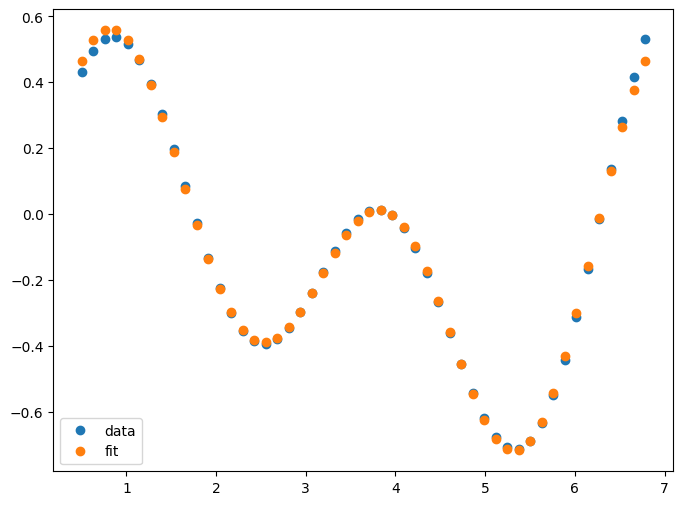

In [29]:
plt.figure(figsize=(8, 6))
plt.plot(X, y, "o", label="data")
plt.plot(X, y_hat, "o", label="fit")
plt.legend(loc="best")
plt.show()

This code will display a graph that plots the input data points and the predictions made by the QNN on the same graph, allowing you to compare the two and see how well the QNN has fit the data.

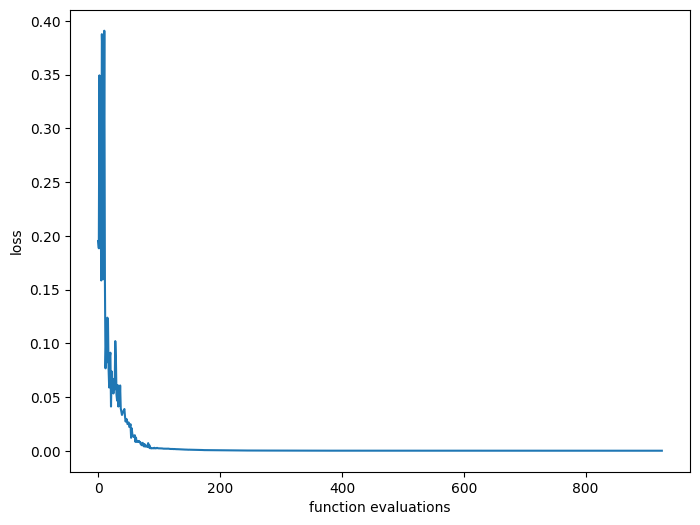

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(loss_history)
plt.ylabel("loss")
plt.xlabel("function evaluations")
plt.show()

This will display a graph that plots the loss history against the number of function evaluations, which in this case corresponds to the number of optimization steps taken during the training of the QNN. This can be useful for understanding how the loss function changes over time, and can indicate if the optimization algorithm is making progress towards finding a good set of parameters for the QNN.

# Classification

In [31]:
num_inputs = 2
num_samples = 20

X = 2 * np.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)
y = 2 * y01 - 1

This code creates a 2D array `X` with `num_samples` rows and `num_inputs` columns. The values in the array are randomly generated numbers between -1 and 1. It multiplies the random values by 2 and subtracts 1 to get the values between -1 and 1.

Then it creates a new variable `y01` that is equal to 1 if the sum of the elements in each row of `X` is greater than or equal to 0, else 0.

Then it creates a new variable `y` that is equal to `2 * y01 - 1`, this is equivalent to mapping 0 to -1 and 1 to 1.

It means, we are creating a binary classification problem where `X` is a 2-dimensional input space of `num_samples` samples with `num_inputs` features and `y` is a binary output (-1, 1) indicating the class of the samples.

In [32]:
from torch import Tensor

X_ = Tensor(X)
y01_ = Tensor(y01).reshape(len(y)).long()
y_ = Tensor(y).reshape(len(y), 1)

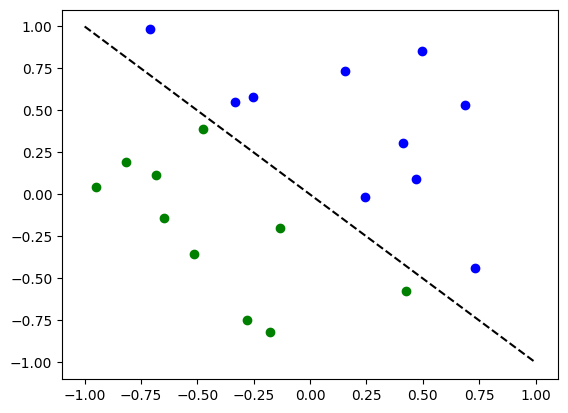

In [33]:
for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")

    else:
        plt.plot(x[0], x[1], "go")

plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

This code is plotting a scatter plot of `X`, where the points are colored blue if their corresponding value in `y` is 1 and green if the value is -1. The line `plt.plot([-1, 1], [1, -1], '--', color='black')` is plotting a diagonal line with a dashed style, this line separates the points in two regions, the points above the line have $y=1$ and the points below the line have $y=-1$.

In [34]:
from qiskit_machine_learning.neural_networks import TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit import BasicAer

qnn = TwoLayerQNN(
    num_qubits=num_inputs,
    quantum_instance=BasicAer.get_backend("statevector_simulator"),
)

initial_weights = 0.1 * (2 * np.random.random(qnn.num_weights) - 1)
model = TorchConnector(qnn, initial_weights)
print("Initial Weights: ", initial_weights)

Initial Weights:  [ 0.06696973 -0.02812149 -0.09155609 -0.06973436  0.0138001   0.04944962
  0.07294072  0.01887594]


The code above imports the necessary modules and classes to create a 2-layer quantum neural network (`TwoLayerQNN`) and connect it to a torch connector (`TorchConnector`). It also sets the number of qubits to the number of inputs (`num_inputs`) and sets the `quantum_instance` to the `statevector_simulator` from `BasicAer`. The initial weights for the network are also set to a random value between -0.1 and 0.1. The number of weights is also printed with the initial weights.

In [35]:
from torch.nn import MSELoss
from torch.optim import LBFGS

optimizer = LBFGS(model.parameters())
f_loss = MSELoss(reduction="sum")

model.train()

TorchConnector()

The above code is defining an optimizer and loss function for the QNN. The optimizer being used is the limited-memory Broyden-Fletcher-Goldfarb-Shanno (LBFGS) algorithm, which is a popular optimization algorithm for neural networks. The loss function being used is the mean squared error (MSE) loss, which measures the average squared difference between the predicted and actual values. The `reduction` attribute is set to `'sum'` which means that the loss is computed as the sum of squared differences.

And `model.train()` is to set the model in training mode, which turns on dropout and batch normalization if they are used in the model.

In [36]:
def closure():
    """
    This function performs a single optimization step by computing the loss,
    performing the backward pass, and updating the model parameters.
    """
    optimizer.zero_grad()
    loss = f_loss(model(X_), y_)
    loss.backward()
    return loss


for _ in range(100):
    optimizer.step(closure)

The for loop here is training the model for 100 iterations. At each iteration, the `closure()` function is called which performs the following steps:

* It sets the gradients of the model parameters to zero.

* It calculates the loss by comparing the model's output to the target output.

* It calculates the gradients of the model parameters with respect to the loss.

* It returns the loss.

* The optimizer updates the model's parameters using the gradients and the specific optimization algorithm used (LBFGS) to minimize the loss.

* The loop continues for 100 iterations, updating the model's parameters at each iteration, until the model has been trained for 100 iterations.

In [37]:
y_predict = []

for x, y_target in zip(X, y):
    output = model(Tensor(x))
    y_predict += [np.sign(output.detach().numpy())[0]]

print("Accuracy: ", sum(y_predict == y) / len(y))

Accuracy:  0.45


The code above is computing the prediction of a two-layer quantum neural network (QNN) trained on the provided data `X` and target values `y`. The QNN has been defined using the `TwoLayerQNN` class and its weights have been optimized using the `LBFGS` optimizer and the mean squared error loss function `MSELoss`. The trained model is then evaluated on the input data `X` using the `model(Tensor(X))` function, which returns the predicted target values.

The prediction is then converted to a binary class using the `np.sign` function and compared to the actual target values `y` to compute the accuracy of the prediction. The accuracy is calculated as the ratio of the number of correct predictions to the total number of samples.

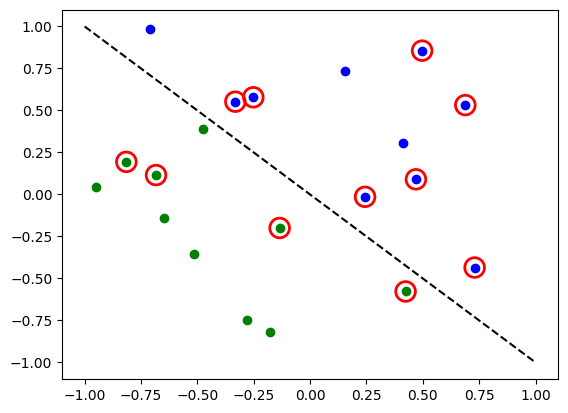

In [38]:
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")

    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)

plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

This code generates a scatter plot of the input data points, colored based on their target values (blue for positive, green for negative). The points that are not correctly predicted are also plotted as red circles, with larger size and black edge. Finally, it plots a line with the equation $y = x - 1$ to visualize the boundary that separates positive and negative samples.